# Visualizing Philippine National Captital Region at Night

## Import packages

In [1]:
import h5py
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Define constants

In [2]:
SHP_PATH = "./data/boundary/"
HDF5_PATH = "./data/yearly/VNP46A4.A2012001.h30v07.001.2021125045659.h5"

DATASET_PATH = "HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/"
LATITUDE_DATASET = DATASET_PATH + "lat"
LONGITUDE_DATASET = DATASET_PATH + "lon"
RADIANCE_DATASET = DATASET_PATH + "NearNadir_Composite_Snow_Free"
MASK_DATASET = DATASET_PATH + "Land_Water_Mask"

## Load shapefile

<Axes: >

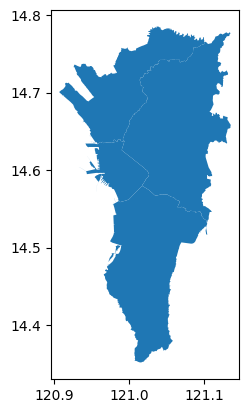

In [3]:
boundary_gdf = gpd.read_file(
    SHP_PATH + "phl_admbnda_adm2_psa_namria_20200529.shp"
)

# Get the boundary of the National Capital Region (NCR)
ncr_gdf = boundary_gdf[boundary_gdf["ADM1_PCODE"] == "PH130000000"]
ncr_gdf.plot()

## Get datasets from HDF5 file

In [4]:
# Get datasets from HDF5 file
with h5py.File(HDF5_PATH, "r") as hdf5_file:
    latitude_data = hdf5_file[LATITUDE_DATASET][:]
    longitude_data = hdf5_file[LONGITUDE_DATASET][:]
    mask_data = hdf5_file[MASK_DATASET][:]
    radiance_data = hdf5_file[RADIANCE_DATASET][:]

# Set radiance of water pixels to 0
radiance_data[mask_data == 255] = 0

# Get the bounding box of the data
hdf5_extent = [
    longitude_data.min(),
    longitude_data.max(),
    latitude_data.min(),
    latitude_data.max(),
]

## Plot the data

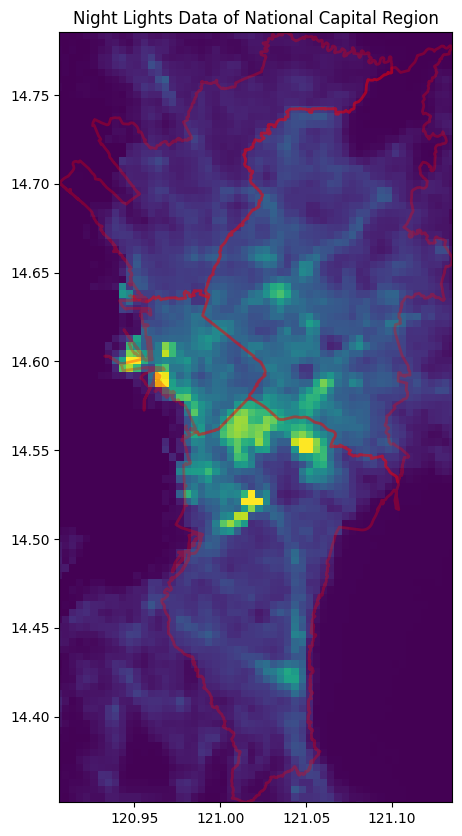

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the radiance data
ax.imshow(
    radiance_data,
    cmap="viridis",
    vmin=0,
    vmax=1000,
    extent=hdf5_extent,
)

# Plot the administrative boundary
ncr_gdf.boundary.plot(ax=ax, color="red", linewidth=2, alpha=0.3)

# Use the boundary of NCR to set the extent of the plot
(minx, miny, maxx, maxy) = ncr_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.title("Night Lights Data of National Capital Region")
plt.show()